In [26]:
%matplotlib inline

2020-08-20 08:09:35,515 [DEBUG] [1030] matplotlib.pyplot: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [27]:
import smartdata

In [28]:
from smartdata.utils.common import print_attributes as pa
from smartdata.utils.dframe import display_full_df as ddff

In [29]:
import pandas as pd

In [30]:
import sys, os

sys.path.append(r'C:\dev\code\gmt-amp\python-analytics-platform')

from gmt.dna.amp.framework.runner import run
from gmt.dna.amp.framework.utils.utils import day_end

Entry point: `cli.py`

In [31]:
from gmt.dna.amp.framework.cli import get_args

In [32]:
from gmt.dna.amp.framework.runner import run
from gmt.dna.amp.framework.runner import *

In [33]:
sys.argv

['C:\\Users\\ashubert\\AppData\\Roaming\\Python\\Python37\\site-packages\\ipykernel_launcher.py',
 '-f',
 'C:\\Users\\ashubert\\AppData\\Roaming\\jupyter\\runtime\\kernel-1622e3a7-e468-4969-994f-279324e235b8.json',
 '--from-date',
 '2011-01-01',
 '--to-date',
 '2022-12-31',
 '--env',
 'prod',
 '--config',
 'C:\\dev\\code\\gmt-amp\\python-analytics-platform\\config\\gas.euroview.prices.full.models.json',
 '--log-level',
 'debug',
 '--overrides',
 'redis://gmdv-ampapp02:6379/0/900:overrides',
 '--model-params',
 'redis://gmdv-ampapp02:6379/0/900:model_params',
 '--run-id',
 '1030',
 '--work-dir',
 'C:\\dev\\code\\gmt-amp\\python-analytics-platform\\gmt\\dna\\amp\\framework\\.work']

In [34]:
s1 = sys.argv

In [35]:
# sys.argv.extend( [
s2 = [
'--from-date', 
'2011-01-01',
'--to-date',
'2022-12-31',
'--env',
'prod',
'--config',
'C:\dev\code\gmt-amp\python-analytics-platform\config\gas.euroview.prices.full.models.json',
'--log-level',
'debug',
'--overrides',
'redis://gmdv-ampapp02:6379/0/900:overrides',
'--model-params',
'redis://gmdv-ampapp02:6379/0/900:model_params',
'--run-id',
'1030',
'--work-dir',
r"C:\dev\code\gmt-amp\python-analytics-platform\gmt\dna\amp\framework\.work"
]

In [36]:
sys.argv = s1 + s2

In [37]:
args = get_args()

Let's debug one by one

In [38]:
current_context.update(run_id=args.run_id)
overall_counter.start_session()
config = load_config(args.config)

In [39]:
config.keys()

dict_keys(['curves', 'data_store_url', 'exclude_raw_data', 'formatting_file_location', 'log', 'models', 'symbol_ttl'])

In [40]:
setup_logging(log_config=config.get('log', {}), work_dir=args.work_dir, level=args.log_level.upper())

2020-08-20 08:09:36,025 [DEBUG] [1030] gmt.dna.amp.framework.utils.log_utils: Logging setup with dict config


In [41]:
logger.info(
        f'Running for {args.from_date} - {args.to_date} with observation date: {args.observation_date}, '
        f'timezone: {args.timezone}, run id: {args.run_id}, config: {args.config}, environment: {args.env}, '
        f'working directory: {args.work_dir}, overrides url: {args.overrides}, model params url: {args.model_params}, '
        f'client token id: {args.client_token_id}'
    )

2020-08-20 08:09:36,049 [INFO] [1030] gmt.dna.amp.framework.runner: Running for 2011-01-01 00:00:00+01:00 - 2022-12-31 23:59:59+01:00 with observation date: 2020-08-20 00:00:00+02:00, timezone: CET, run id: 1030, config: C:\dev\code\gmt-amp\python-analytics-platform\config\gas.euroview.prices.full.models.json, environment: prod, working directory: C:\dev\code\gmt-amp\python-analytics-platform\gmt\dna\amp\framework\.work, overrides url: redis://gmdv-ampapp02:6379/0/900:overrides, model params url: redis://gmdv-ampapp02:6379/0/900:model_params, client token id: None


In [42]:
event_dir = os.path.join(args.work_dir, 'events')

In [43]:
event_dir

'C:\\dev\\code\\gmt-amp\\python-analytics-platform\\gmt\\dna\\amp\\framework\\.work\\events'

In [44]:
# Clear the events before running the models to make sure nothing's left behind
done_event_file = os.path.join(event_dir, '{}.done_event'.format(args.task_id))
error_event_file = os.path.join(event_dir, '{}.error_event'.format(args.task_id))
run_name = '{} - {}'.format(args.run_id, os.path.basename(args.config))

In [45]:
# First remove the event files
clear_event(event_file=done_event_file)
clear_event(event_file=error_event_file)

In [46]:
with model_counter.for_component(component='runner'):
    override_map = load_overrides(overrides_url=args.overrides, timezone=args.timezone.zone)
    model_params_map = load_model_params(model_params_url=args.model_params)

In [47]:
import matplotlib.pyplot as plt

In [48]:
import matplotlib

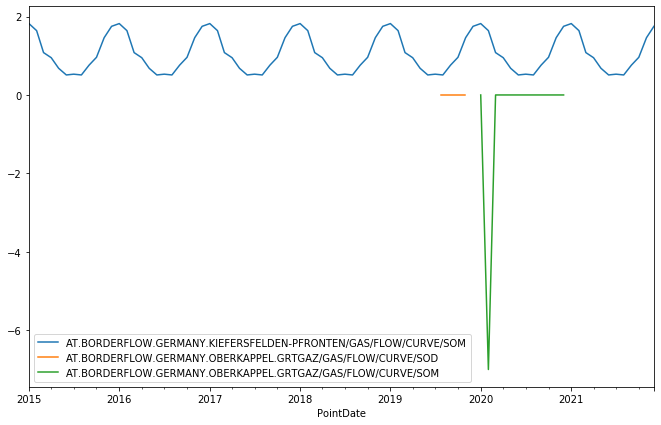

In [52]:
fig, ax = plt.subplots(1,1)
figsize = (7*1.6, 7)
override_map.get(list(override_map.keys())[0]).head(100).astype(float).plot(figsize=figsize, ax=ax)
override_map.get(list(override_map.keys())[1]).head(100).astype(float).plot(figsize=figsize, ax=ax)
override_map.get(list(override_map.keys())[2]).head(100).astype(float).plot(figsize=figsize, ax=ax)

In [53]:
override_map.update(model_params_map)

In [56]:
list(override_map.keys())[:10]

['AT.BORDERFLOW.GERMANY.KIEFERSFELDEN-PFRONTEN/GAS/FLOW/CURVE/SOM',
 'AT.BORDERFLOW.GERMANY.OBERKAPPEL.GRTGAZ/GAS/FLOW/CURVE/SOD',
 'AT.BORDERFLOW.GERMANY.OBERKAPPEL.GRTGAZ/GAS/FLOW/CURVE/SOM',
 'AT.BORDERFLOW.GERMANY.OBERKAPPEL.OGE/GAS/FLOW/CURVE/SOD',
 'AT.BORDERFLOW.GERMANY.OBERKAPPEL.OGE/GAS/FLOW/CURVE/SOM',
 'AT.BORDERFLOW.GERMANY.OBERKAPPEL.VIP/GAS/FLOW/CURVE/SOM',
 'AT.BORDERFLOW.HUNGARY.MOSONMAGYAROVAR.ENTRY.ECLIPSE/GAS/FLOW/ACTUAL/SOD',
 'AT.BORDERFLOW.HUNGARY.MOSONMAGYAROVAR.EXIT.ECLIPSE/GAS/FLOW/ACTUAL/SOD',
 'AT.BORDERFLOW.HUNGARY.MOSONMAGYAROVAR.PC/GAS/FLOW/ACTUAL/SOD',
 'AT.BORDERFLOW.HUNGARY.MOSONMAGYAROVAR/GAS/FLOW/CURVE/SOD']